# OLS REGRESSION CHALLENGE

# Introduction

In [1]:
# My name is Konstantinos Grousouzakos and I am aspiring to become a Data Analyst.

# My educational background consists of a Bachelor's in Mechanical Engineering and a Master's in
# Industrial Engineering.

# My passion for statistics and data driven decision making has led me to choose the profession of 
# Data Analyst as the one that fits best to my temperament, personality and natural skills.

# This is my first attempt at creating a predictive model using
# Machine Learning (Multilinear Regression).Thank you for taking the time to take a glance. 
# Any feedback is welcome.

# Date of Exercise Completion: 12th of December 2022
# In the next cell,there is a hyperlink to my LinkedIn profile.

www.linkedin.com/in/konstantinos-grousouzakos-data-analyst

# Description of the Exercise

In [2]:
# Multiple Linear Regression Challenge

# Background

# These data were aggregated from a number of sources including the American Community Survey (census.gov),
# clinicaltrials.gov, and cancer.gov. Most of the data preparation process can be viewed here.

# The goal is to build a Multivariate Ordinary Least Squares Regression model to predict "TARGET_deathRate"

# Deliverables
# a. The final model equation

# b. The statistical software output including (adjusted) R-squared and Root Mean Squared Error (RMSE)

# c. Other factors to consider:

# - Are there any outliers?
# - Are there missing values?
# - How the categorical variables must be handled?

# Data Dictionary
# TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

# avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

# avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

# incidenceRate: Mean per capita (100,000) cancer diagnoses(a)

# medianIncome: Median income per county (b)

# popEst2015: Population of county (b)

# povertyPercent: Percent of populace in poverty (b)

# studyPerCap: Per capita number of cancer-related clinical trials per county (a)

# binnedInc: Median income per capita binned by decile (b)

# MedianAge: Median age of county residents (b)

# MedianAgeMale: Median age of male county residents (b)

# MedianAgeFemale: Median age of female county residents (b)

# Geography: County name (b)

# AvgHouseholdSize: Mean household size of county (b)

# PercentMarried: Percent of county residents who are married (b)

# PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school
# (b)

# PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

# PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

# PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

# PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school 
# diploma (b)

# PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's 
# degree (b)

# PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

# PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

# PctPrivateCoverage: Percent of county residents with private health coverage (b)

# PctPrivateCoverageAlone: Percent of county residents with private health coverage alone 
# (no public assistance) (b)

# PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

# PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

# PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

# PctWhite: Percent of county residents who identify as White (b)

# PctBlack: Percent of county residents who identify as Black (b)

# PctAsian: Percent of county residents who identify as Asian (b)

# PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 
# (b)

# PctMarriedHouseholds: Percent of married households (b)

# BirthRate: Number of live births relative to number of women in county (b)

# (a): years 2010-2016

# (b): 2013 Census Estimates 

# In the next cell, there is a hyperlink to dataset.

https://data.world/nrippner/ols-regression-challenge

# Getting Familiar with the Dataset

In [3]:
# The first step is to get an idea of how the data are organized and determine what kind of data the 
# dataset contains (numerical, strings, etc.). I find MS Excel to be quite useful, since it displays 
# the entire dataset (if the dataset is somewhat large, Python displays only part of it) in a 
# tabular form that can be navigated in a “user friendly” way. After opening the cancer_reg.csv file,
# I adjust the width of the columns and proceed to make an initial “scan” of the dataset. 

In [4]:
# Most of the data are numeric (continuous or discreet variables) with the exception of the columns 
# “Geography” (the column contains string values) and “binnedInc” (the column contains numeric values 
#in the form of an interval).

# In addition, missing values can be spotted
# It is obvious that the dataset needs to “cleaned” and preprocessed before it is used for model
# building. The next step is to jump to Python and start the “cleaning/ preprocessing” stage. 

# Libraries and data

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("cancer_reg.csv", encoding='latin-1')
cancer_df = data.copy()
cancer_df.head(2)
# Without the encoding paremeter, this error presents itself:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 41137: invalid continuation byte

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096


# Exploratory Data Analysis

In [7]:
cancer_df.describe()
# At first glance, I can see that some of the variables (columns) definitely contain outliers 
# (The maximum value observed is way greater than the 75% percentile. The standard deviation is 2 or 
# 3 times higher compared to the mean, which indicates that the data of this variable are very spread 
# out).

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [8]:
cancer_df.isnull().sum() 
# The columns that are missing values, will be dropped. 

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [9]:
cancer_df.dtypes
# All the variables are numeric (integers or floats) except from the columns with the labels 
# “Geography” and “binnedInc”. The data type they hold is defined as “object” data type.

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

In [10]:
cancer_df.columns
# Helps me write code that explores or manipulates columns 

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

# Data Cleaning and Preprocessing

In [11]:
# Exploring the categorical values

In [12]:
print(type(cancer_df['binnedInc'][0]))
print(type(cancer_df['Geography'][0]))
# The “Geography” column can be characterized as a categorical value and indeed contains pieces of 
# information stored as text (strings). However, the “binnedInc” column contains numeric data in 
# the form of intervals, presented as strings.

<class 'str'>
<class 'str'>


In [13]:
cancer_df['Geography'][0]

'Kitsap County, Washington'

In [14]:
cancer_df['binnedInc'][0]

'(61494.5, 125635]'

In [15]:
cancer_df['binnedInc'].describe() # Ten different unique kinds of variables. No action is needed for now.

count                   3047
unique                    10
top       (54545.6, 61494.5]
freq                     306
Name: binnedInc, dtype: object

In [16]:
cancer_df[['Geography']].describe()
# Every entry of the Series is unique, because every county in a specific state is unique. 
# We could break it down to states instead of counties 

,Geography
count,3047
unique,3047
top,"Kitsap County, Washington"
freq,1


In [17]:
# Deleting the variables that contain missing data from the numeric dataset
del cancer_df["PctSomeCol18_24"]
del cancer_df["PctEmployed16_Over"]
del cancer_df["PctPrivateCoverageAlone"]
cancer_df.shape

(3047, 31)

In [18]:
Geo_cat_var = cancer_df["Geography"].copy() # Copying the data from the "Geography" column to a variable
Geo_cat_var

0          Kitsap County, Washington
1        Kittitas County, Washington
2       Klickitat County, Washington
3           Lewis County, Washington
4         Lincoln County, Washington
                    ...             
3042        Ellsworth County, Kansas
3043           Finney County, Kansas
3044             Ford County, Kansas
3045         Franklin County, Kansas
3046            Geary County, Kansas
Name: Geography, Length: 3047, dtype: object

In [19]:
for i in range(0, len(Geo_cat_var)):
    Geo_cat_var[i] = Geo_cat_var[i].split(',')[1]
Geo_cat_var 
# Splitting each element of the series and keeping only the information regarding state.

0        Washington
1        Washington
2        Washington
3        Washington
4        Washington
           ...     
3042         Kansas
3043         Kansas
3044         Kansas
3045         Kansas
3046         Kansas
Name: Geography, Length: 3047, dtype: object

In [20]:
cancer_df["Geography"] = Geo_cat_var
cancer_df["Geography"] 
# Substituting the data from the variable to the dataframe's column

0        Washington
1        Washington
2        Washington
3        Washington
4        Washington
           ...     
3042         Kansas
3043         Kansas
3044         Kansas
3045         Kansas
3046         Kansas
Name: Geography, Length: 3047, dtype: object

In [21]:
cancer_df[['Geography']].describe() # The number of unigue values are 51 now

,Geography
count,3047
unique,51
top,Texas
freq,233


In [22]:
cancer_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096


In [23]:
# Visualizing the data is always a great way to get a first glance at how they are distributed. 
# If we get a “visual cue”, we are going to explore more in depth the distribution by accessing a 
# specific range of percentiles. Based on the distribution, meaning that if any extreme values present 
# themselves, we will ‘’shorten” the dataset.

# We execute the following lines of code  to create histograms and reveal the percentiles. 
# Wherever it is necessary, we delete the rows that contain outliers.

array([[<AxesSubplot:title={'center':'avgAnnCount'}>,
        <AxesSubplot:title={'center':'avgDeathsPerYear'}>,
        <AxesSubplot:title={'center':'TARGET_deathRate'}>,
        <AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>],
       [<AxesSubplot:title={'center':'popEst2015'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>,
        <AxesSubplot:title={'center':'studyPerCap'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>],
       [<AxesSubplot:title={'center':'MedianAgeFemale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>,
        <AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>],
       [<AxesSubplot:title={'center':'PctBachDeg18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25

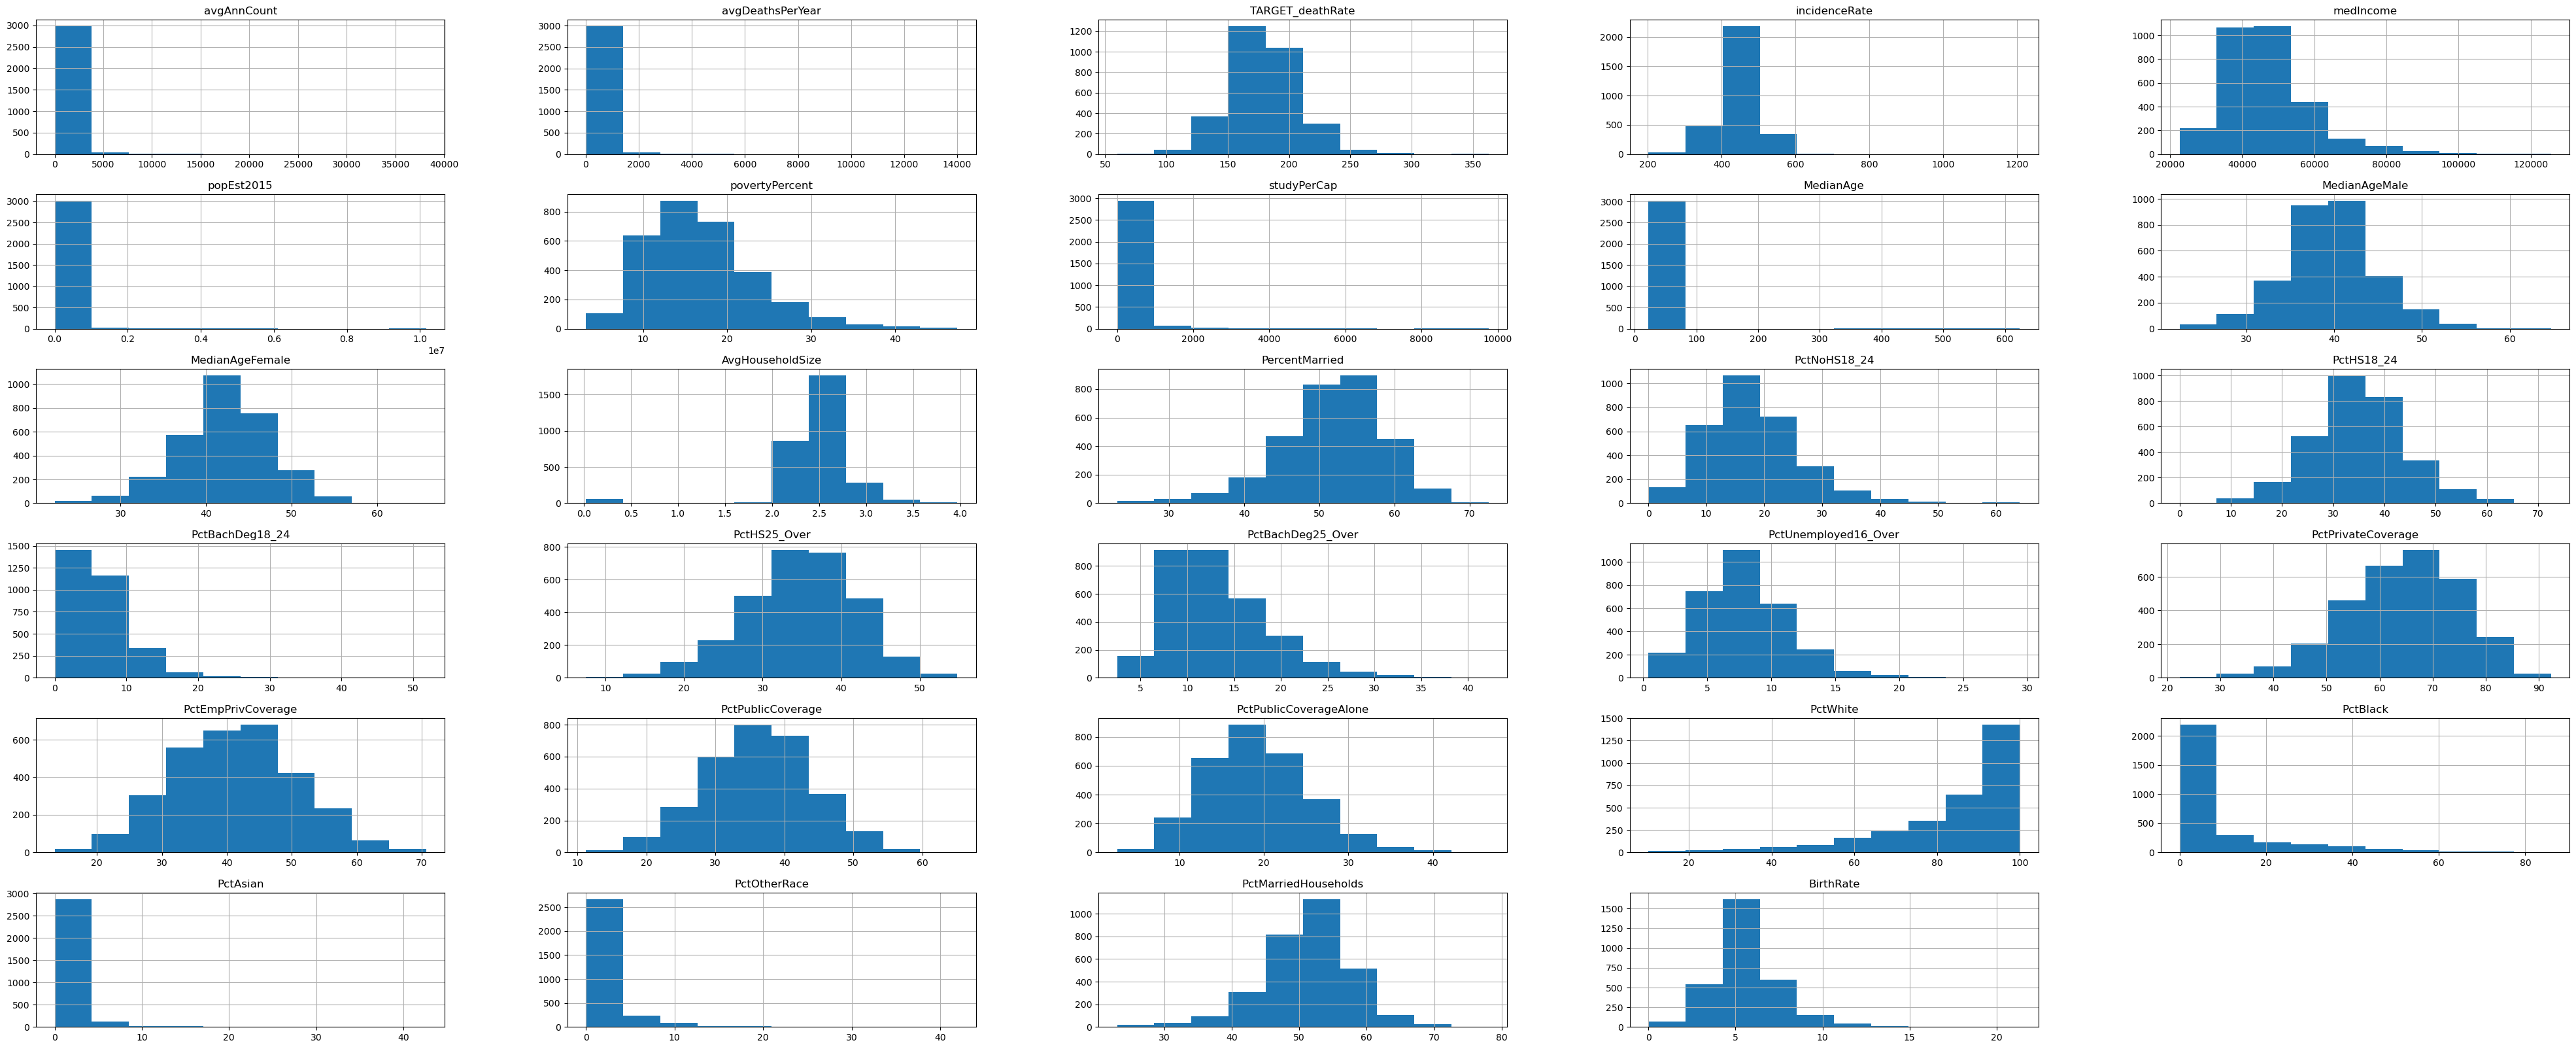

In [24]:
cancer_df.hist(figsize = (50,20),xlabelsize = 10 ,ylabelsize = 10)

In [25]:
# At first glance, most of the variables seem to be distributed in a "normal-way" or follow a specific 
# pattern. The variables that seem to require further investigation are:
# 'avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 
# 'studyPerCap','MedianAge'

<AxesSubplot:>

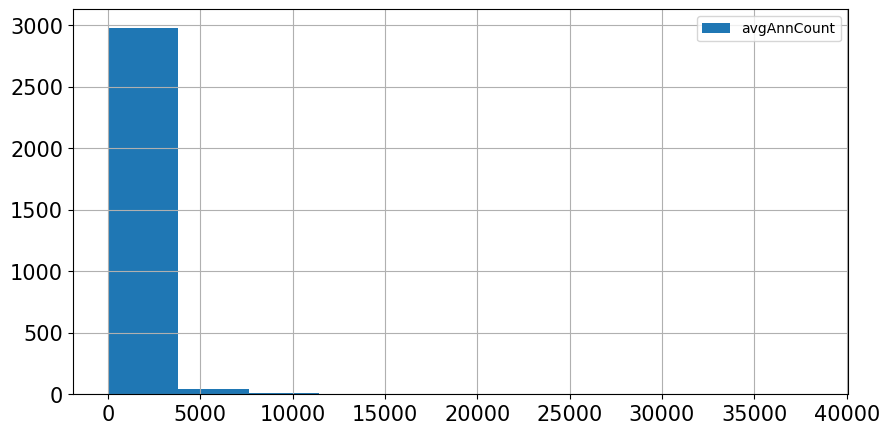

In [26]:
# Variable: 'avgAnnCount' , Histogram before "shortening"
Variable = 'avgAnnCount'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

In [27]:
# Variable: 'avgAnnCount'
for i in range(0,105,5):
    print( np.percentile(cancer_df[Variable], i).round(2), "Percentile: ", i)
    # Displaying the percentiles

6.0 Percentile:  0
23.0 Percentile:  5
37.0 Percentile:  10
49.0 Percentile:  15
61.0 Percentile:  20
76.0 Percentile:  25
92.0 Percentile:  30
107.0 Percentile:  35
123.0 Percentile:  40
145.0 Percentile:  45
171.0 Percentile:  50
204.3 Percentile:  55
242.6 Percentile:  60
298.0 Percentile:  65
397.0 Percentile:  70
518.0 Percentile:  75
744.6 Percentile:  80
1190.5 Percentile:  85
1962.67 Percentile:  90
1972.0 Percentile:  95
38150.0 Percentile:  100


In [28]:
# Variable: 'avgAnnCount'
print(len(cancer_df)) # Displaying the number of rows before "shortening"
cancer_df = cancer_df[cancer_df[Variable]< 15000]
print(len(cancer_df)) # Displaying the number of rows after "shortening"

3047
3044


<AxesSubplot:>

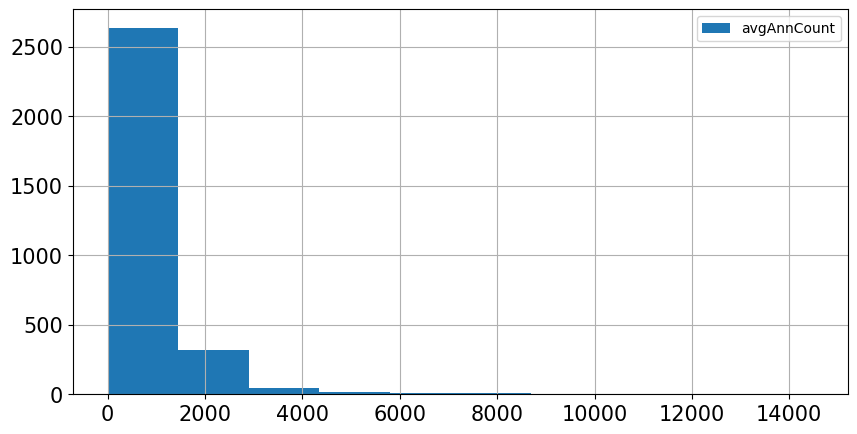

In [29]:
# Variable: 'avgAnnCount' , Histogram after "shortening"
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

<AxesSubplot:>

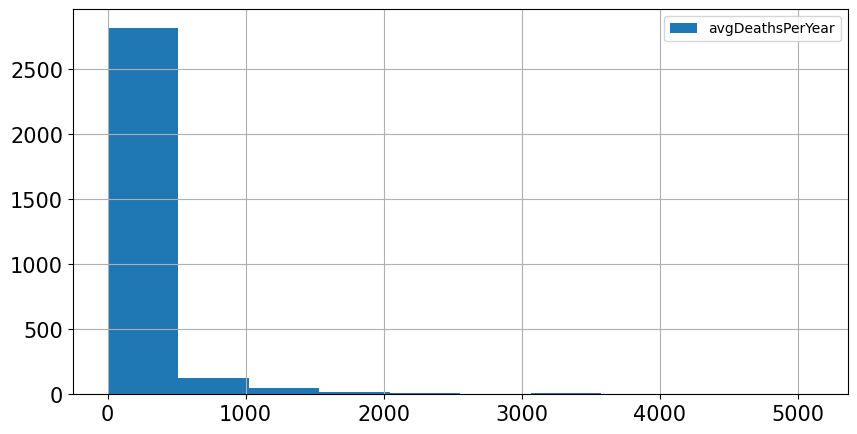

In [30]:
# Variable: 'avgDeathsPerYear' 
Variable = 'avgDeathsPerYear'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

In [31]:
# Variable: 'avgDeathsPerYear'
for i in range(0,105,5):
    print( np.percentile(cancer_df[Variable], i).round(2), "Percentile: ", i)

3.0 Percentile:  0
9.0 Percentile:  5
14.0 Percentile:  10
18.0 Percentile:  15
23.0 Percentile:  20
28.0 Percentile:  25
34.0 Percentile:  30
40.0 Percentile:  35
47.0 Percentile:  40
53.0 Percentile:  45
61.0 Percentile:  50
71.0 Percentile:  55
84.0 Percentile:  60
99.0 Percentile:  65
118.0 Percentile:  70
148.25 Percentile:  75
188.0 Percentile:  80
251.1 Percentile:  85
374.7 Percentile:  90
740.7 Percentile:  95
5108.0 Percentile:  100


In [32]:
# Variable: 'avgDeathsPerYear'
print(len(cancer_df))
cancer_df = cancer_df[cancer_df[Variable]< 4000]
print(len(cancer_df))

3044
3040


<AxesSubplot:>

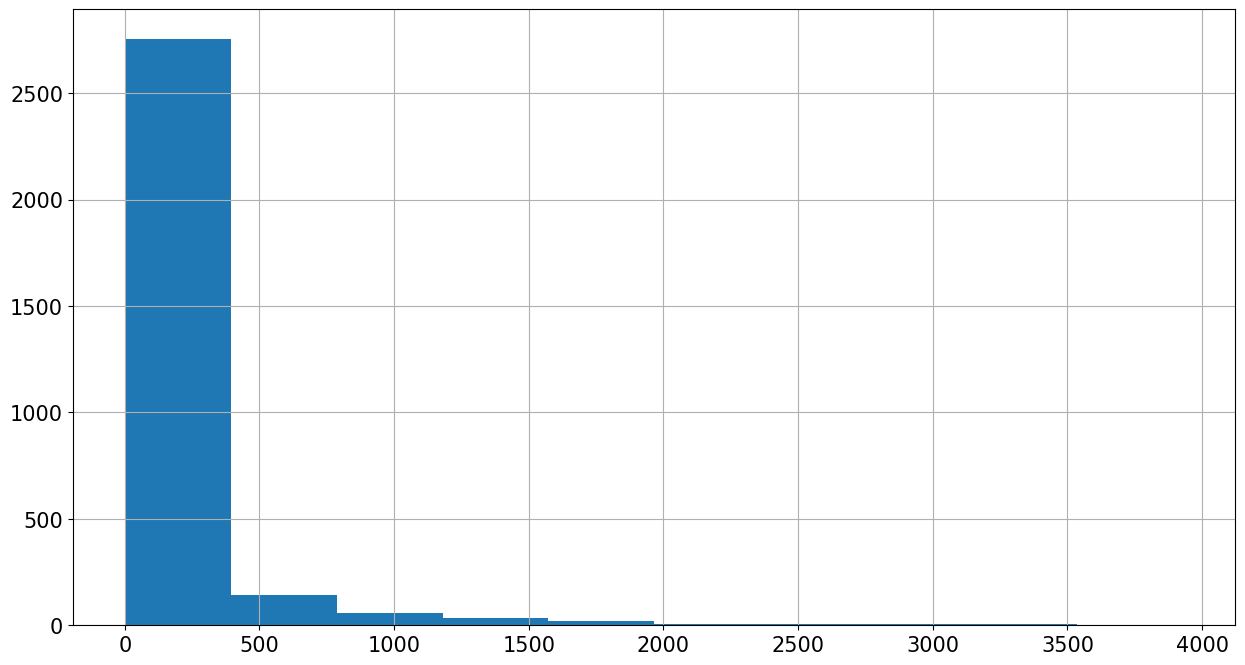

In [33]:
# Variable: 'avgDeathsPerYear'
cancer_df[Variable].hist(figsize = (15,8),
                                       xlabelsize = 15,
                                      ylabelsize = 15)

<AxesSubplot:>

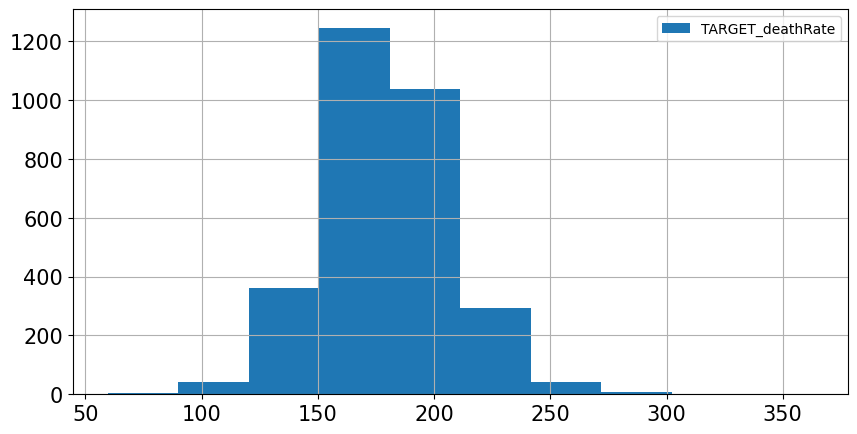

In [34]:
# Variable: 'TARGET_deathRate'
Variable = 'TARGET_deathRate'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

In [35]:
# Variable: 'TARGET_deathRate'
for i in range(0,105,5):
    print( np.percentile(cancer_df[Variable], i).round(2), "Percentile: ", i)

59.7 Percentile:  0
134.1 Percentile:  5
145.4 Percentile:  10
151.9 Percentile:  15
156.88 Percentile:  20
161.3 Percentile:  25
164.8 Percentile:  30
168.3 Percentile:  35
171.6 Percentile:  40
174.96 Percentile:  45
178.2 Percentile:  50
181.3 Percentile:  55
184.3 Percentile:  60
187.54 Percentile:  65
191.3 Percentile:  70
195.3 Percentile:  75
200.2 Percentile:  80
205.62 Percentile:  85
213.4 Percentile:  90
224.4 Percentile:  95
362.8 Percentile:  100


In [36]:
# Variable: 'TARGET_deathRate'
print(len(cancer_df))
cancer_df = cancer_df[cancer_df[Variable]< 350]
print(len(cancer_df))

3040
3039


<AxesSubplot:>

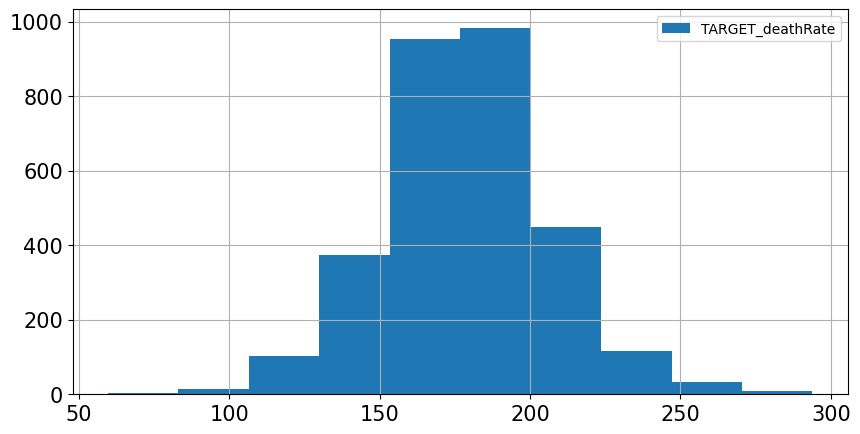

In [37]:
# Variable: 'TARGET_deathRate'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

<AxesSubplot:>

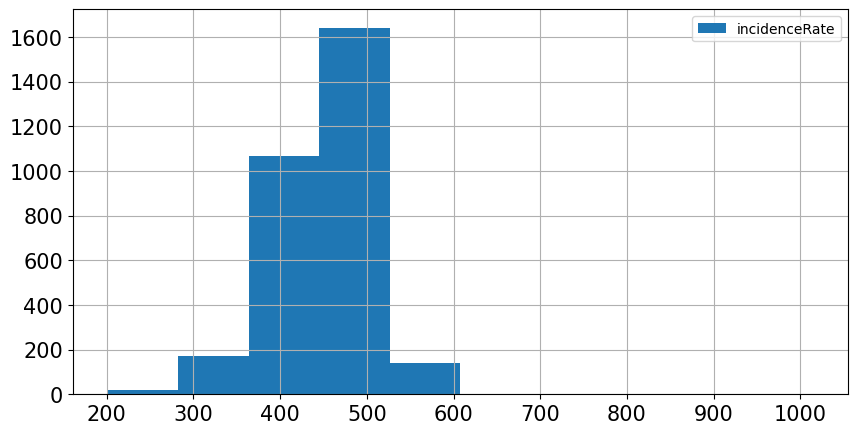

In [38]:
# Variable: 'incidenceRate'
Variable = 'incidenceRate'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

In [39]:
# Variable: 'incidenceRate'
for i in range(0,105,5):
    print( np.percentile(cancer_df[Variable], i).round(2), "Percentile: ", i)

201.3 Percentile:  0
355.1 Percentile:  5
380.68 Percentile:  10
398.64 Percentile:  15
410.0 Percentile:  20
420.45 Percentile:  25
428.14 Percentile:  30
435.33 Percentile:  35
443.42 Percentile:  40
450.41 Percentile:  45
453.55 Percentile:  50
455.6 Percentile:  55
461.16 Percentile:  60
467.57 Percentile:  65
473.96 Percentile:  70
480.9 Percentile:  75
488.1 Percentile:  80
495.4 Percentile:  85
507.32 Percentile:  90
525.0 Percentile:  95
1014.2 Percentile:  100


In [40]:
# Variable: 'incidenceRate'
print(len(cancer_df))
cancer_df = cancer_df[cancer_df[Variable]< 650]
print(len(cancer_df))

3039
3036


<AxesSubplot:>

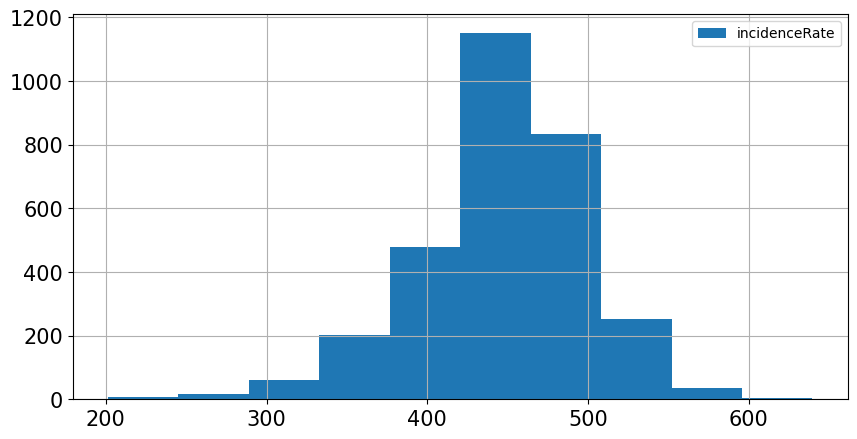

In [41]:
# Variable: 'incidenceRate'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

<AxesSubplot:>

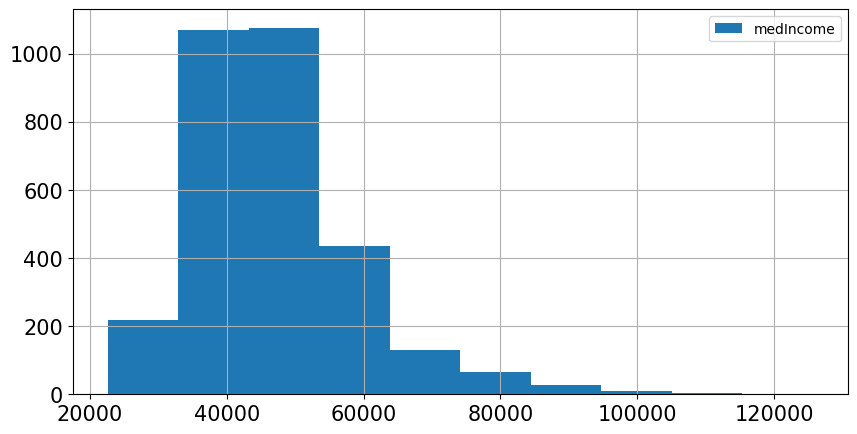

In [42]:
# Variable: 'medIncome'
Variable = 'medIncome'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

In [43]:
# Variable: 'medIncome'
for i in range(0,105,5):
    print( np.percentile(cancer_df[Variable], i).round(2), "Percentile: ", i)

22640.0 Percentile:  0
31835.0 Percentile:  5
34211.0 Percentile:  10
35927.75 Percentile:  15
37410.0 Percentile:  20
38870.5 Percentile:  25
40354.0 Percentile:  30
41439.25 Percentile:  35
42720.0 Percentile:  40
43889.75 Percentile:  45
45192.5 Percentile:  50
46527.75 Percentile:  55
48006.0 Percentile:  60
49566.5 Percentile:  65
51030.0 Percentile:  70
52455.0 Percentile:  75
54472.0 Percentile:  80
57353.75 Percentile:  85
61269.0 Percentile:  90
69923.0 Percentile:  95
125635.0 Percentile:  100


In [44]:
# Variable: 'medIncome'
print(len(cancer_df))
cancer_df = cancer_df[cancer_df[Variable]< 118000]
print(len(cancer_df))

3036
3034


<AxesSubplot:>

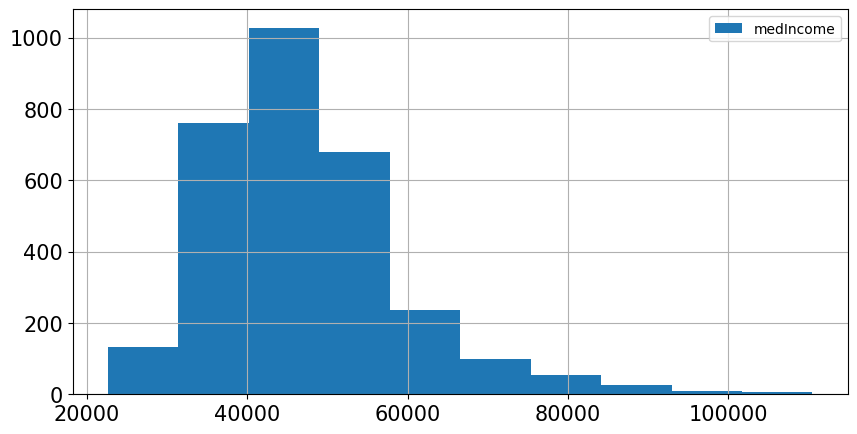

In [45]:
# Variable: 'medIncome'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

<AxesSubplot:>

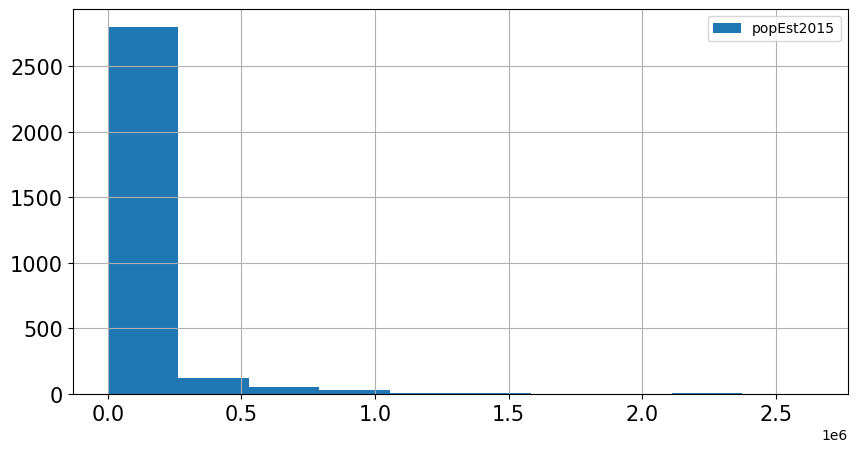

In [46]:
# Variable: 'popEst2015'
Variable = 'popEst2015'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

In [47]:
# Variable: 'popEst2015'
for i in range(0,105,5):
    print( np.percentile(cancer_df[Variable], i).round(2), "Percentile: ", i)

827.0 Percentile:  0
3656.2 Percentile:  5
5789.8 Percentile:  10
7658.85 Percentile:  15
9523.8 Percentile:  20
11648.75 Percentile:  25
14057.2 Percentile:  30
16542.45 Percentile:  35
19424.8 Percentile:  40
22739.45 Percentile:  45
26517.5 Percentile:  50
31557.25 Percentile:  55
37432.2 Percentile:  60
44323.85 Percentile:  65
53715.8 Percentile:  70
68463.5 Percentile:  75
93251.2 Percentile:  80
133700.15 Percentile:  85
203638.5 Percentile:  90
415314.4 Percentile:  95
2636735.0 Percentile:  100


In [48]:
# Variable: 'popEst2015'
print(len(cancer_df))
cancer_df = cancer_df[cancer_df[Variable]< 420000]
print(len(cancer_df))

3034
2883


<AxesSubplot:>

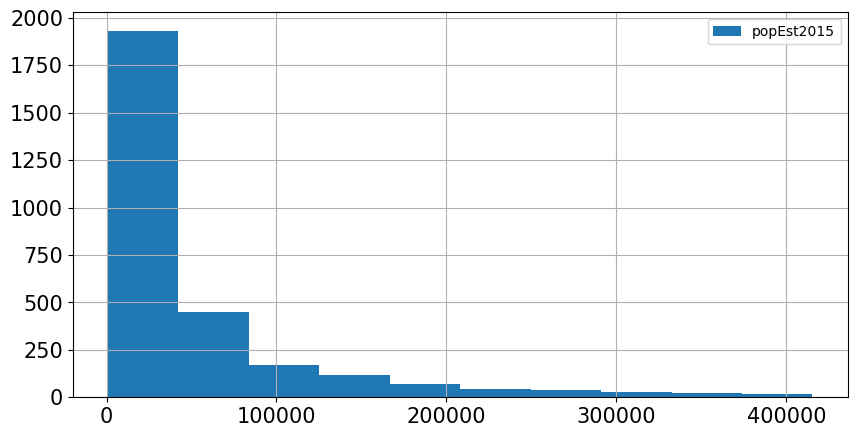

In [49]:
# Variable: 'popEst2015'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

<AxesSubplot:>

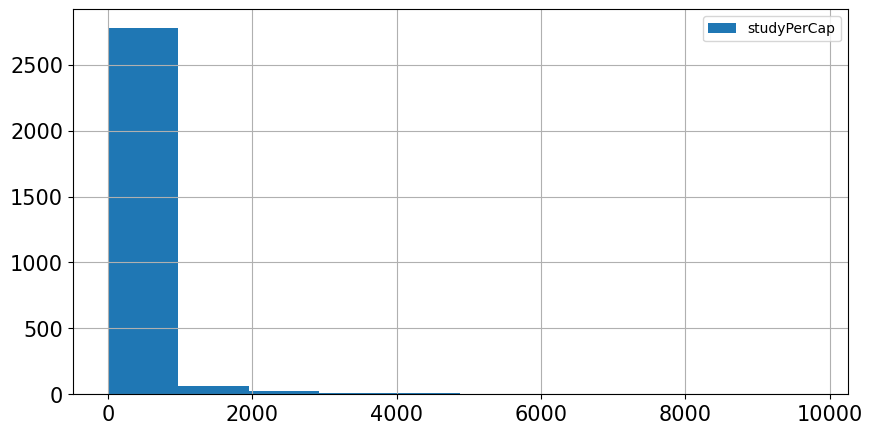

In [50]:
# Variable: 'studyPerCap'
Variable = 'studyPerCap'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

In [51]:
# Variable: 'studyPerCap'
for i in range(0,105,5):
    print( np.percentile(cancer_df[Variable], i).round(2), "Percentile: ", i)

0.0 Percentile:  0
0.0 Percentile:  5
0.0 Percentile:  10
0.0 Percentile:  15
0.0 Percentile:  20
0.0 Percentile:  25
0.0 Percentile:  30
0.0 Percentile:  35
0.0 Percentile:  40
0.0 Percentile:  45
0.0 Percentile:  50
0.0 Percentile:  55
0.0 Percentile:  60
0.0 Percentile:  65
23.18 Percentile:  70
55.45 Percentile:  75
109.85 Percentile:  80
195.33 Percentile:  85
376.25 Percentile:  90
716.62 Percentile:  95
9762.31 Percentile:  100


In [52]:
# Variable: 'studyPerCap'
print(len(cancer_df))
cancer_df = cancer_df[cancer_df[Variable]< 5000]
print(len(cancer_df))

2883
2879


<AxesSubplot:>

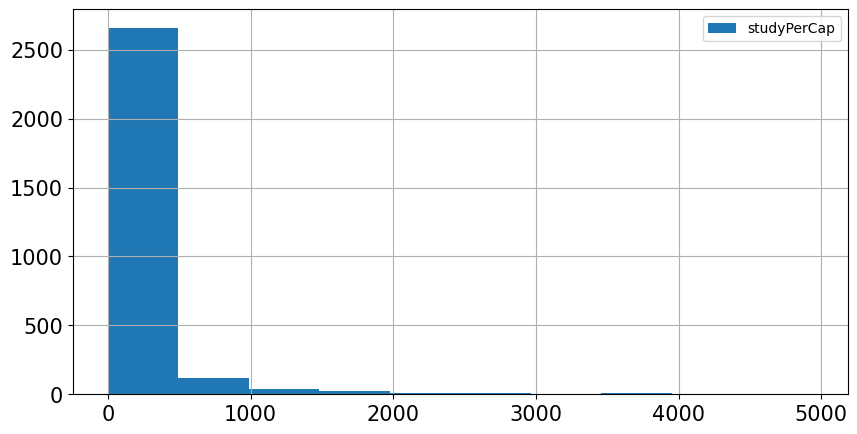

In [53]:
# Variable: 'studyPerCap'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

<AxesSubplot:>

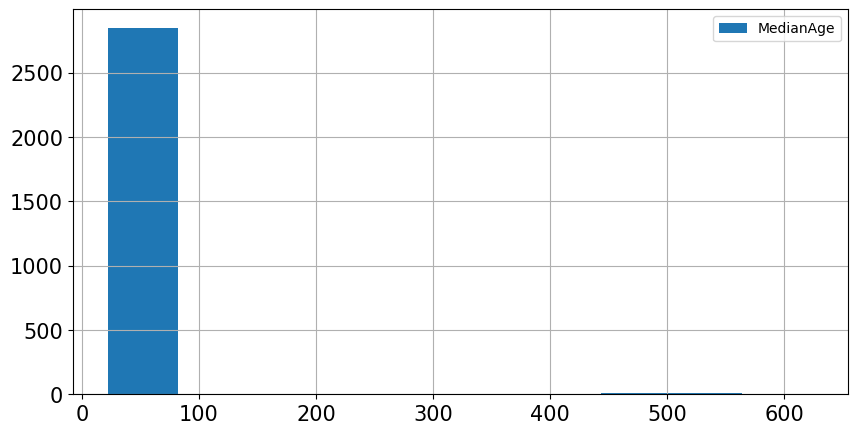

In [54]:
# Variable: 'MedianAge'
Variable = 'MedianAge'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

In [55]:
# Variable: 'MedianAge'
for i in range(0,105,5):
    print( np.percentile(cancer_df[Variable], i).round(2), "Percentile: ", i)

22.3 Percentile:  0
32.0 Percentile:  5
34.7 Percentile:  10
36.0 Percentile:  15
37.1 Percentile:  20
38.0 Percentile:  25
38.8 Percentile:  30
39.5 Percentile:  35
40.1 Percentile:  40
40.7 Percentile:  45
41.2 Percentile:  50
41.7 Percentile:  55
42.2 Percentile:  60
42.8 Percentile:  65
43.46 Percentile:  70
44.2 Percentile:  75
45.1 Percentile:  80
46.3 Percentile:  85
47.9 Percentile:  90
50.3 Percentile:  95
624.0 Percentile:  100


In [56]:
# Variable: 'MedianAge'
print(len(cancer_df))
cancer_df = cancer_df[cancer_df[Variable]< 100] # KIND OF RARE FOR SOMEONE TO BE MORE 600 YR OLD!!!
print(len(cancer_df))

2879
2850


<AxesSubplot:>

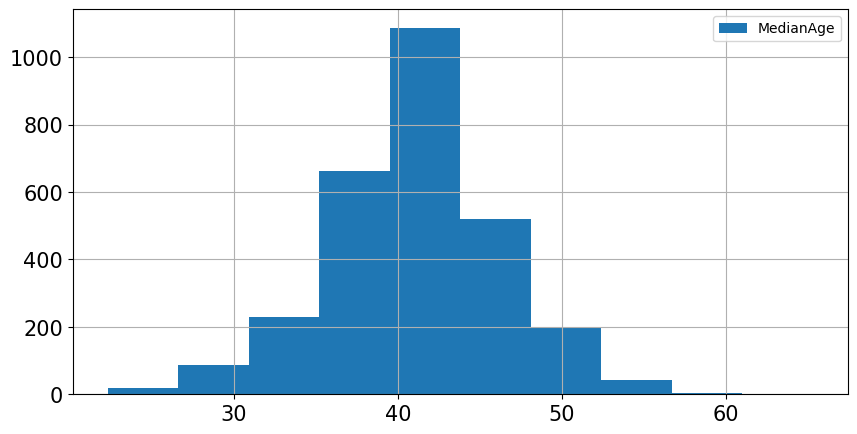

In [57]:
# Variable: 'MedianAge'
cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

In [58]:
# Dividing the dataset to numeric dataframe and categorical dataframe
cancer_df_num = cancer_df.drop(columns = ['binnedInc','Geography'])
cancer_df_num

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,63.7,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,58.4,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,61.6,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,78.3,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,64.5,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,62.0,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,75.9,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [59]:
cancer_df_cat = cancer_df[['binnedInc','Geography']]
cancer_df_cat

,binnedInc,Geography
0,"(61494.5, 125635]",Washington
1,"(48021.6, 51046.4]",Washington
2,"(48021.6, 51046.4]",Washington
3,"(42724.4, 45201]",Washington
4,"(48021.6, 51046.4]",Washington
...,...,...
3042,"(45201, 48021.6]",Kansas
3043,"(48021.6, 51046.4]",Kansas
3044,"(51046.4, 54545.6]",Kansas
3045,"(48021.6, 51046.4]",Kansas


In [60]:
cancer_df.isnull().sum() 

avgAnnCount               0
avgDeathsPerYear          0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
binnedInc                 0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
Geography                 0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
dtype: int64

C:\Users\Constantine\AppData\Local\Temp\ipykernel_5892\4170902774.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = cancer_df.corr(),


<AxesSubplot:>

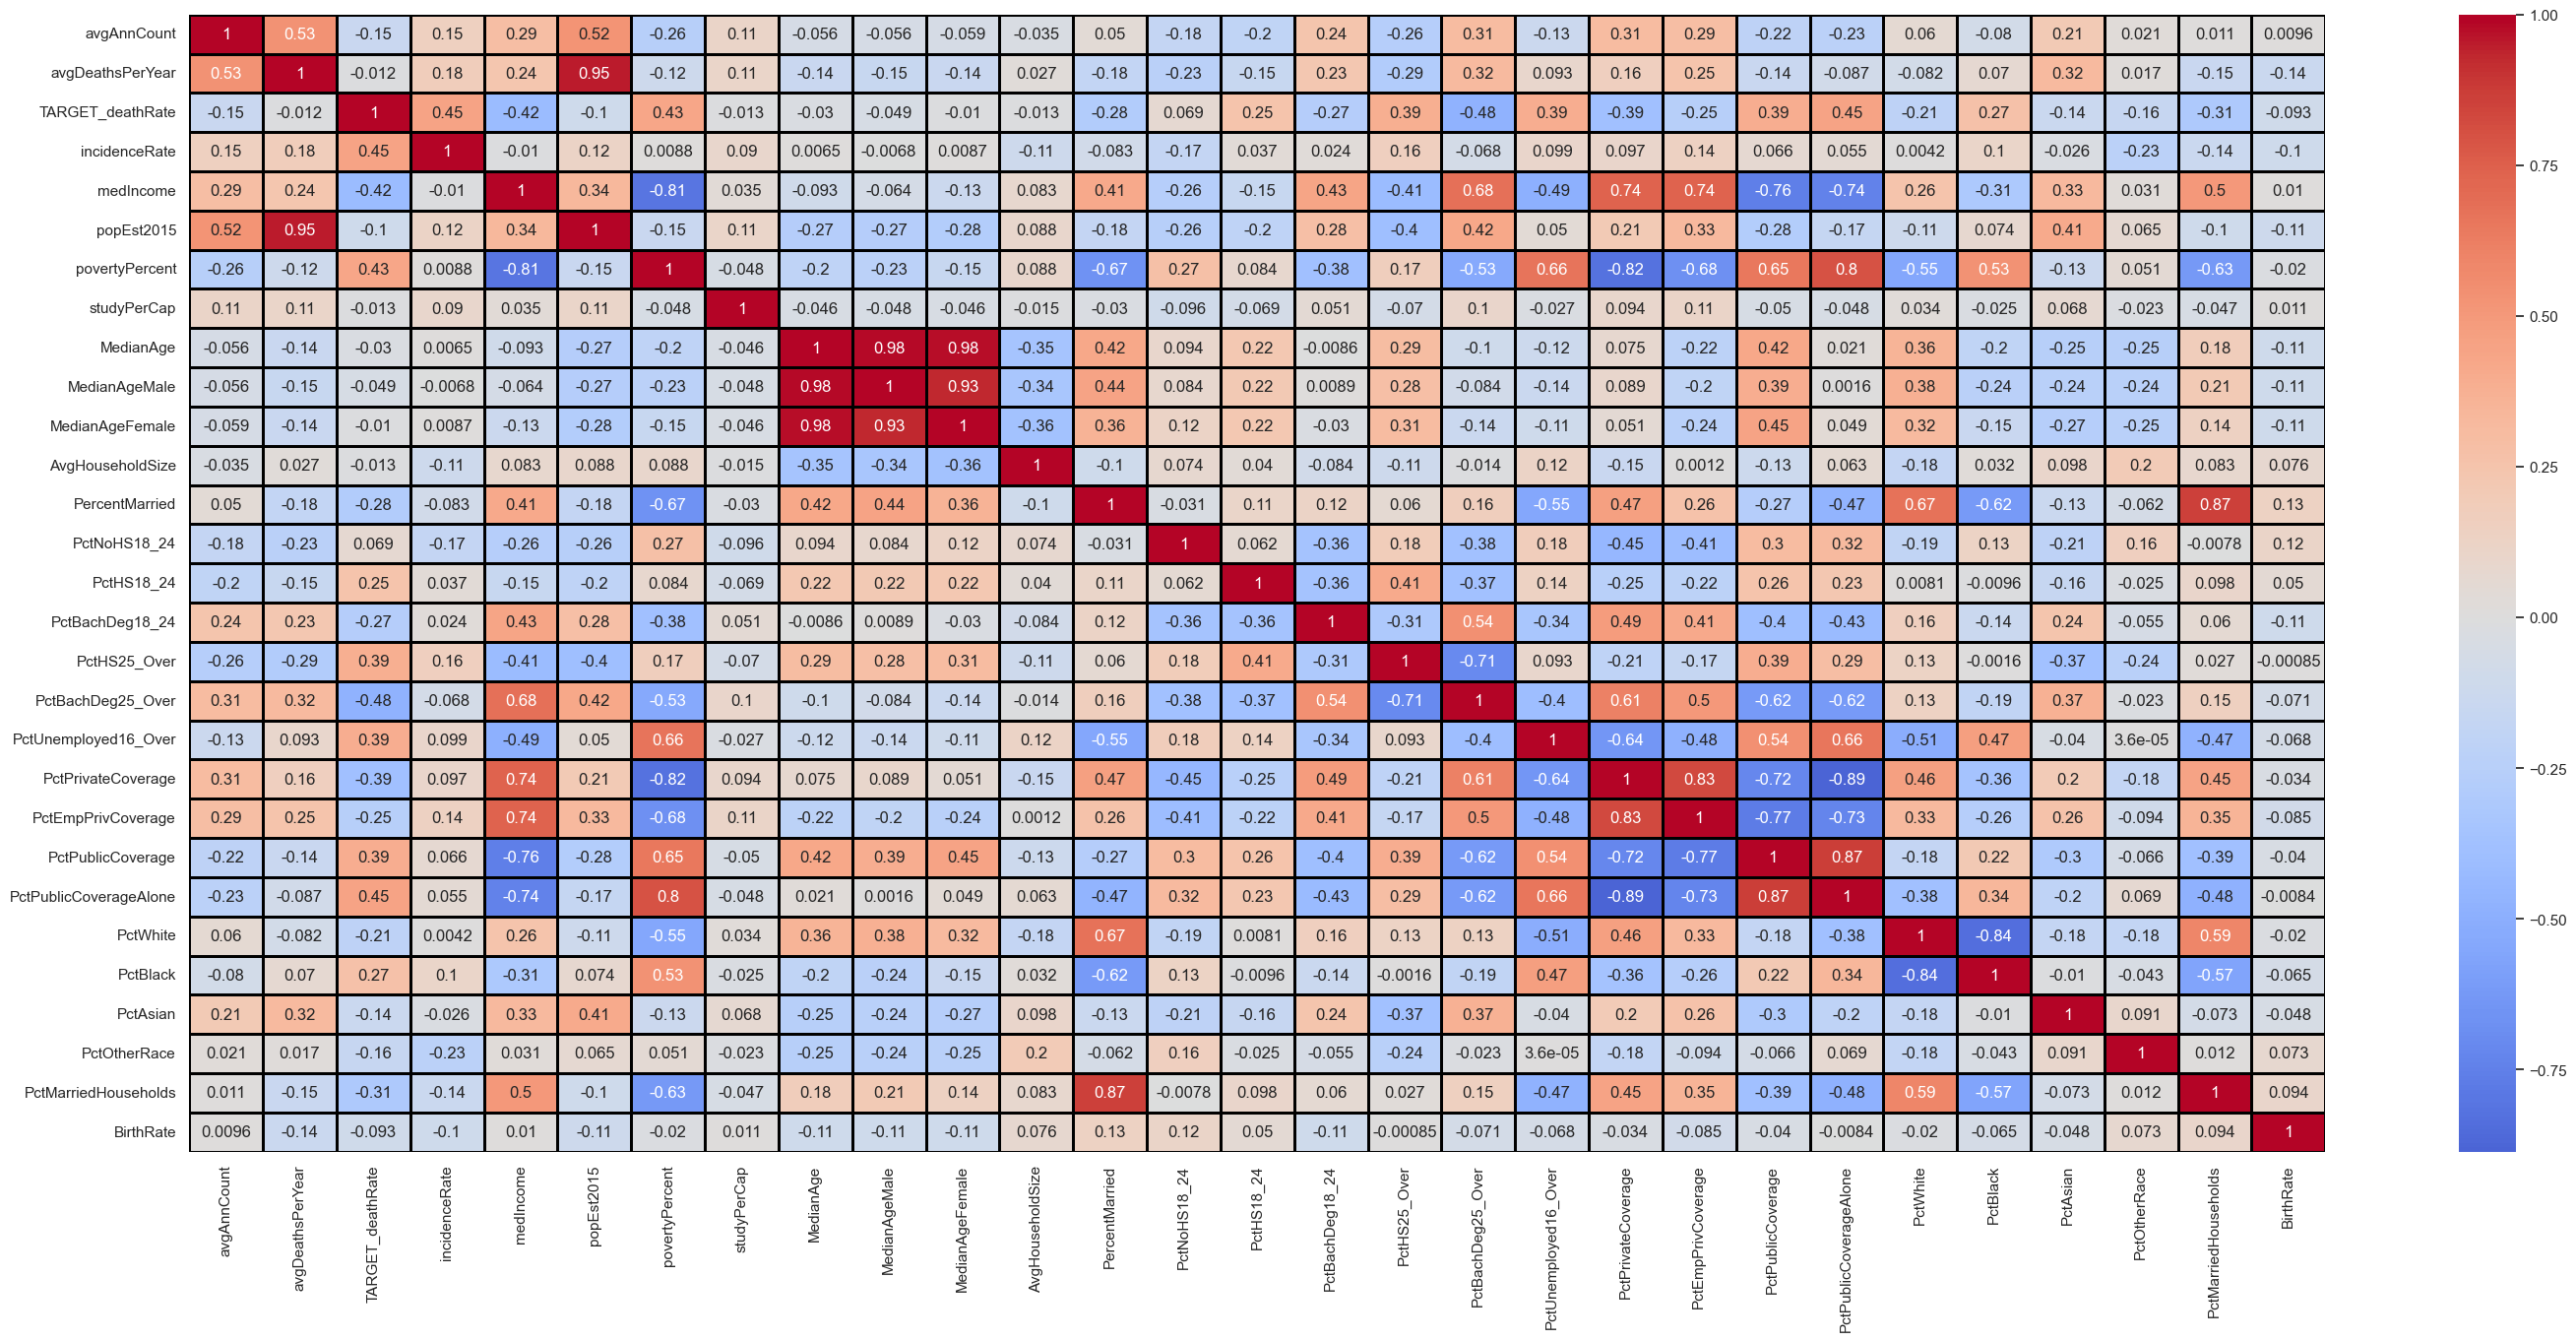

In [61]:
# Avoiding collinearity when selecting predictors
# When 2 or more independent variables in a model are highly correlated we say that we have a 
# multicollinearity problem
sns.set(rc = {'figure.figsize':(35,15)})
sns.heatmap(data = cancer_df.corr(),
          annot = True,
         fmt = '.2g',
         center = 0,
          cmap = 'coolwarm',
          linewidths = 1, linecolor = 'black')
# Creating a heatmap to detect if there is any high correlation between the independent variables

In [62]:
# There are some of the variables that are strongly correlated (negatively or positively).
# Maybe it is best to check for Multicollinearity with the help of Variance Inflation Factor

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant  
  
X = add_constant(cancer_df_num)  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)  

const                     1457.262556
avgAnnCount                  1.612528
avgDeathsPerYear            15.478194
TARGET_deathRate             2.056126
incidenceRate                1.590245
medIncome                    7.374041
popEst2015                  17.274183
povertyPercent               8.291531
studyPerCap                  1.051514
MedianAge                  245.077091
MedianAgeMale               83.493620
MedianAgeFemale             62.004581
AvgHouseholdSize             1.340489
PercentMarried               8.905176
PctNoHS18_24                 1.695301
PctHS18_24                   1.598647
PctBachDeg18_24              1.751980
PctHS25_Over                 3.404982
PctBachDeg25_Over            5.145371
PctUnemployed16_Over         2.544328
PctPrivateCoverage          15.798106
PctEmpPrivCoverage           7.491546
PctPublicCoverage           22.984893
PctPublicCoverageAlone      22.327596
PctWhite                     6.758188
PctBlack                     5.287117
PctAsian    

In [64]:
# All the variables where VIF > 5 , will be dropped
# If VIF < 1 : Low correlation
# If  1< VIF < 5 : Medium correlation
# If VIF > 5 : High correlation

In [65]:
columns_to_erase = []
for i in range(0, len(ds)):
    if ds[i] > 5:
        columns_to_erase.append(ds.index[i])
columns_to_erase # Constructing an iterable

['const',
 'avgDeathsPerYear',
 'medIncome',
 'popEst2015',
 'povertyPercent',
 'MedianAge',
 'MedianAgeMale',
 'MedianAgeFemale',
 'PercentMarried',
 'PctBachDeg25_Over',
 'PctPrivateCoverage',
 'PctEmpPrivCoverage',
 'PctPublicCoverage',
 'PctPublicCoverageAlone',
 'PctWhite',
 'PctBlack',
 'PctMarriedHouseholds']

In [66]:
columns_to_erase.remove('const')
columns_to_erase

['avgDeathsPerYear',
 'medIncome',
 'popEst2015',
 'povertyPercent',
 'MedianAge',
 'MedianAgeMale',
 'MedianAgeFemale',
 'PercentMarried',
 'PctBachDeg25_Over',
 'PctPrivateCoverage',
 'PctEmpPrivCoverage',
 'PctPublicCoverage',
 'PctPublicCoverageAlone',
 'PctWhite',
 'PctBlack',
 'PctMarriedHouseholds']

In [67]:
for i in columns_to_erase:
    del cancer_df_num[i]
cancer_df_num.head(2) # Deleting the columns of interest

,avgAnnCount,TARGET_deathRate,incidenceRate,studyPerCap,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctUnemployed16_Over,PctAsian,PctOtherRace,BirthRate
0,1397.0,164.9,489.8,499.748204,2.54,11.5,39.5,6.9,23.2,8.0,4.821857,1.843479,6.118831
1,173.0,161.3,411.6,23.111234,2.34,6.1,22.4,7.5,26.0,7.8,2.246233,3.741352,4.333096


In [68]:
X = add_constant(cancer_df_num)  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)  # Checking the VIF again

const                   198.428984
avgAnnCount               1.197341
TARGET_deathRate          1.756437
incidenceRate             1.453750
studyPerCap               1.029164
AvgHouseholdSize          1.091608
PctNoHS18_24              1.293160
PctHS18_24                1.341748
PctBachDeg18_24           1.521667
PctHS25_Over              1.669593
PctUnemployed16_Over      1.325780
PctAsian                  1.232185
PctOtherRace              1.181505
BirthRate                 1.053366
dtype: float64


<AxesSubplot:>

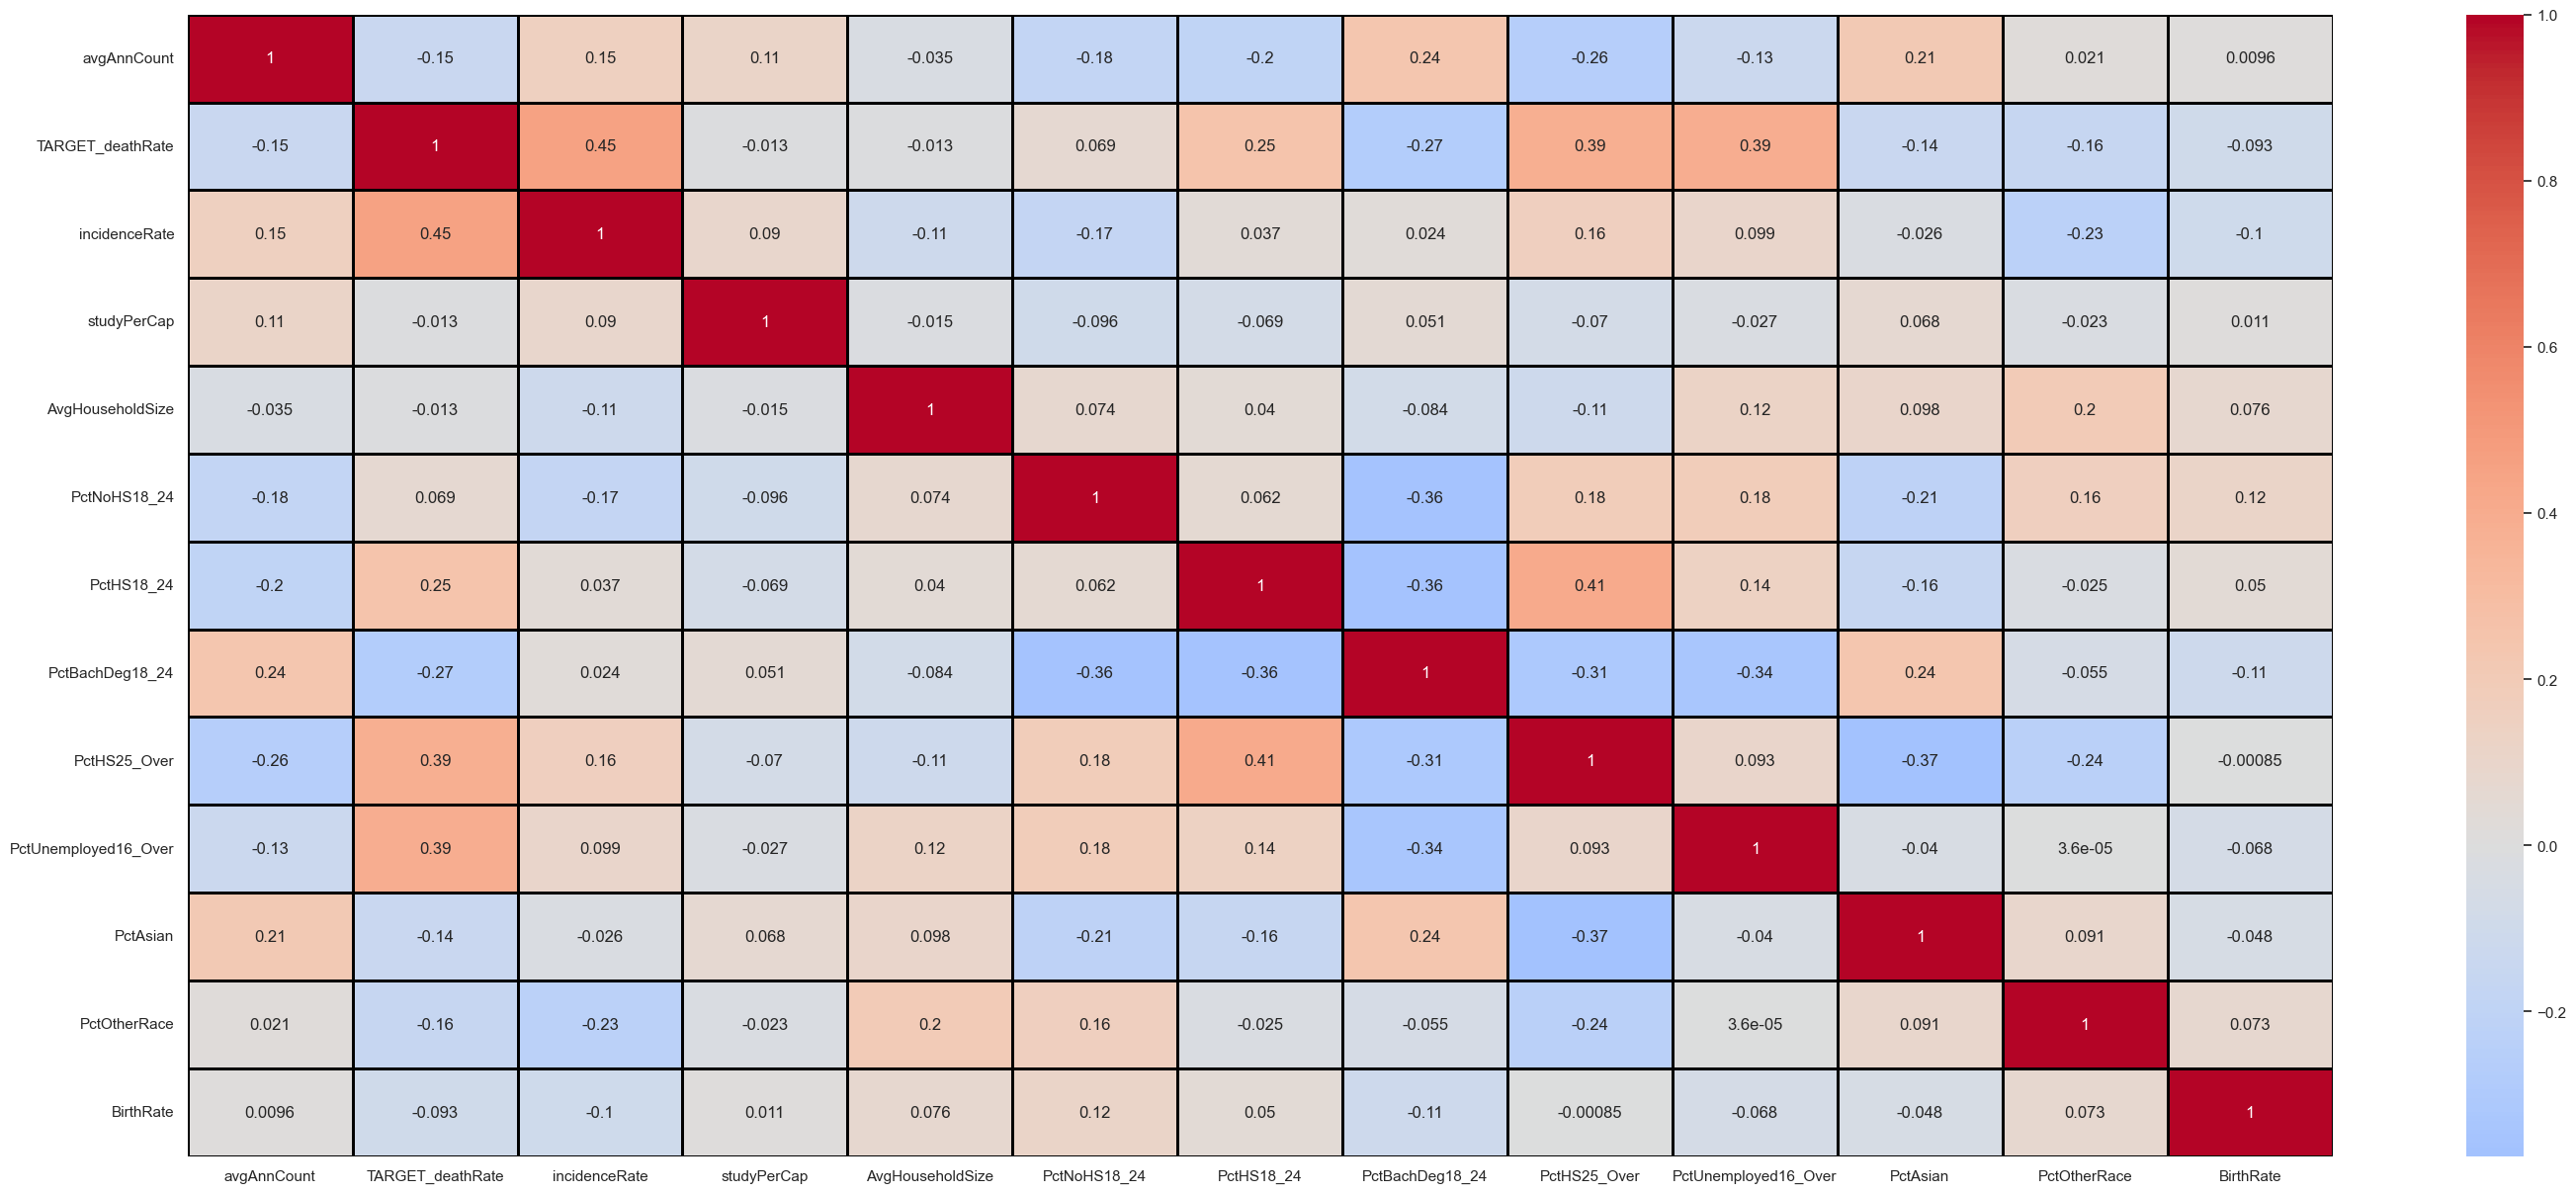

In [69]:
sns.set(rc = {'figure.figsize':(35,15)})
sns.heatmap(data = cancer_df_num.corr(),
          annot = True,
         fmt = '.2g',
         center = 0,
          cmap = 'coolwarm',
          linewidths = 1, linecolor = 'black')
# Diplaying again the correlations between variables

In [70]:
cancer_df = pd.concat([cancer_df_num.round(3),cancer_df_cat], axis =  1)
cancer_df # Concatenating the "numerical" dataframe and the "categorical" one

,avgAnnCount,TARGET_deathRate,incidenceRate,studyPerCap,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctUnemployed16_Over,PctAsian,PctOtherRace,BirthRate,binnedInc,Geography
0,1397.000,164.9,489.800,499.748,2.54,11.5,39.5,6.9,23.2,8.0,4.822,1.843,6.119,"(61494.5, 125635]",Washington
1,173.000,161.3,411.600,23.111,2.34,6.1,22.4,7.5,26.0,7.8,2.246,3.741,4.333,"(48021.6, 51046.4]",Washington
2,102.000,174.7,349.700,47.560,2.62,24.0,36.6,9.5,29.0,7.0,0.466,2.747,3.729,"(48021.6, 51046.4]",Washington
3,427.000,194.8,430.400,342.637,2.52,20.2,41.2,2.5,31.6,12.1,1.161,1.363,4.604,"(42724.4, 45201]",Washington
4,57.000,144.4,350.100,0.000,2.34,14.9,43.0,2.0,33.4,4.8,0.666,0.492,6.797,"(48021.6, 51046.4]",Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.668,149.6,453.549,0.000,2.08,20.9,27.9,8.4,32.2,4.3,0.328,1.700,7.774,"(45201, 48021.6]",Kansas
3043,1962.668,150.1,453.549,377.175,2.90,26.7,33.9,3.8,23.1,4.6,4.045,14.130,8.186,"(48021.6, 51046.4]",Kansas
3044,1962.668,153.9,453.549,1968.960,3.04,19.7,44.5,2.5,23.0,6.4,1.316,5.681,7.809,"(51046.4, 54545.6]",Kansas
3045,1962.668,175.0,453.549,0.000,2.56,10.9,37.2,4.1,36.1,6.9,0.245,2.132,7.583,"(48021.6, 51046.4]",Kansas


In [71]:
# We are finally ready to start preparing the Multilinear Regression Model 

# Multilinear Regression 

In [72]:
# Getting Dummy variables, dropping one to  avoid multicollinearity
cancer_df = pd.get_dummies(data = cancer_df, drop_first = True)
cancer_df.head(2)

,avgAnnCount,TARGET_deathRate,incidenceRate,studyPerCap,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctUnemployed16_Over,...,Geography_ South Dakota,Geography_ Tennessee,Geography_ Texas,Geography_ Utah,Geography_ Vermont,Geography_ Virginia,Geography_ Washington,Geography_ West Virginia,Geography_ Wisconsin,Geography_ Wyoming
0,1397.0,164.9,489.8,499.748,2.54,11.5,39.5,6.9,23.2,8.0,...,0,0,0,0,0,0,1,0,0,0
1,173.0,161.3,411.6,23.111,2.34,6.1,22.4,7.5,26.0,7.8,...,0,0,0,0,0,0,1,0,0,0


In [73]:
# Isolating x and y
y = cancer_df['TARGET_deathRate']
x = cancer_df.drop(columns = ['TARGET_deathRate'])
x.head(1)

,avgAnnCount,incidenceRate,studyPerCap,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctUnemployed16_Over,PctAsian,...,Geography_ South Dakota,Geography_ Tennessee,Geography_ Texas,Geography_ Utah,Geography_ Vermont,Geography_ Virginia,Geography_ Washington,Geography_ West Virginia,Geography_ Wisconsin,Geography_ Wyoming
0,1397.0,489.8,499.748,2.54,11.5,39.5,6.9,23.2,8.0,4.822,...,0,0,0,0,0,0,1,0,0,0


In [74]:
# Adding constant
x = sm.add_constant(x)
x.head(1)

,const,avgAnnCount,incidenceRate,studyPerCap,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctUnemployed16_Over,...,Geography_ South Dakota,Geography_ Tennessee,Geography_ Texas,Geography_ Utah,Geography_ Vermont,Geography_ Virginia,Geography_ Washington,Geography_ West Virginia,Geography_ Wisconsin,Geography_ Wyoming
0,1.0,1397.0,489.8,499.748,2.54,11.5,39.5,6.9,23.2,8.0,...,0,0,0,0,0,0,1,0,0,0


In [75]:
# Training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 666 )
x_train.head(2)

,const,avgAnnCount,incidenceRate,studyPerCap,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctUnemployed16_Over,...,Geography_ South Dakota,Geography_ Tennessee,Geography_ Texas,Geography_ Utah,Geography_ Vermont,Geography_ Virginia,Geography_ Washington,Geography_ West Virginia,Geography_ Wisconsin,Geography_ Wyoming
1248,1.0,144.0,461.3,70.351,2.66,20.8,28.9,6.3,33.3,10.7,...,0,0,0,0,0,0,0,0,0,0
2539,1.0,38.0,355.2,855.537,2.83,16.8,55.3,0.1,38.1,17.1,...,0,0,0,0,0,0,0,0,0,0


In [76]:
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     40.74
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:33:17   Log-Likelihood:                -9834.6
No. Observations:                2280   AIC:                         1.981e+04
Df Residuals:                    2209   BIC:                         2.022e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [77]:
# Adj. R-squared: 0.550
    # Not overffiting, not underfitting
# Some variables are not statistically significant (P>|t| >> 0) such as:
    # avgAnnCount : 0.359
    # studyPerCap : 0.908
# One of the Notes is :
    # The condition number is large, 3.87e+04. This might indicate that there are
    # strong multicollinearity or other numerical problems.

# Assessing Model Accuracy

In [78]:
predictions = model.predict(x_test)
predictions

874     172.363569
2140    173.712665
45      213.129911
1972    178.437017
1401    142.813783
           ...    
650     166.573070
1620    160.028178
1518    191.977432
1261    204.738259
2078    190.697699
Length: 570, dtype: float64

In [79]:
# Accuracy Assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", round(mean_absolute_error(y_test, predictions),1))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 14.5
RMSE: 20.0


In [80]:
# The accuracy of the model is good
# The Mean Absolute Error and Root Squared Mean Error values are comparable to Standard Deviation